In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [71]:
df = pd.read_parquet("hf://datasets/FronkonGames/steam-games-dataset/data/train-00000-of-00001-e2ed184370a06932.parquet")

In [72]:
df.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## Data Preprocessing

In [105]:
# creating an info table for summary of dataset
descriptions = [
    'AppID, unique identifier for each app (string).',
    'Game name (string).',
    'Release date (string).',
    'Estimated owners (string, e.g.: "0 - 20000").',
    'Number of concurrent users, yesterday (int).',
    'Age required to play, 0 if it is for all audiences (int).',
    'Price in USD, 0.0 if it is free (float).',
    'Number of DLCs, 0 if you have none (int).',
    'Detailed description of the game (string).',
    'Comma-separated enumeration of supporting languages.',
    'Comma-separated enumeration of languages with audio support.',
    'Does it support Windows? (bool).',
    'Does it support Mac? (bool).',
    'Does it support Linux? (bool).',
    'Metacritic score, 0 if it has none (int).',
    'Users score, 0 if it has none (int).',
    'Positive votes (int).',
    'Negative votes (int).',
    'Number of achievements, 0 if it has none (int).',
    'User recommendations, 0 if it has none (int).',
    'Average playtime since March 2009, in minutes (int).',
    'Average playtime in the last two weeks, in minutes (int).',
    'Median playtime since March 2009, in minutes (int).',
    'Median playtime in the last two weeks, in minutes (int).',
    'Developer name (string).',
    'Game categories.',
    'Game genres.',
    'Tags.'
]


info_table = pd.DataFrame({
    "Data Type": df.dtypes,
    "Null Count": df.isna().sum(),
    'Description': descriptions
})

info_table

,Data Type,Null Count,Description
AppID,int64,0,"AppID, unique identifier for each app (string)."
Name,object,1,Game name (string).
Release date,datetime64[ns],129,Release date (string).
Estimated owners,object,0,"Estimated owners (string, e.g.: ""0 - 20000"")."
Peak CCU,int64,0,"Number of concurrent users, yesterday (int)."
Required age,int64,0,"Age required to play, 0 if it is for all audie..."
Price,float64,0,"Price in USD, 0.0 if it is free (float)."
DLC count,int64,0,"Number of DLCs, 0 if you have none (int)."
About the game,object,0,Detailed description of the game (string).
Supported languages,object,0,Comma-separated enumeration of supporting lang...


In [ ]:
# Drop columns that are not useful
df = df.drop(columns = ['Reviews', 'Support email', 'Support url', 'Metacritic url', 'Header image', 'Website', 'Score rank', 'Notes', 'Publishers', 'Screenshots', 'Movies'])

In [87]:
# number of observations
df.shape

(80123, 28)

In [88]:
# Number of null values
df.isna().sum()

AppID                             0
Name                              1
Release date                    129
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                    0
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                      118
Categories                     1158
Genres                           90
Tags                        

In [85]:
# Drop rows with missing values in the 'About the game' column
df.dropna(subset=['About the game'], inplace=True)

In [89]:
# Variable types
df.dtypes

AppID                                  int64
Name                                  object
Release date                  datetime64[ns]
Estimated owners                      object
Peak CCU                               int64
Required age                           int64
Price                                float64
DLC count                              int64
About the game                        object
Supported languages                   object
Full audio languages                  object
Windows                                 bool
Mac                                     bool
Linux                                   bool
Metacritic score                       int64
User score                             int64
Positive                               int64
Negative                               int64
Achievements                           int64
Recommendations                        int64
Average playtime forever               int64
Average playtime two weeks             int64
Median pla

In [84]:
# Convert the 'Release date' column to datetime
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

In [90]:
# Check unique values for each column
for i in df.columns:
    print(f'{i}: {df[i].unique()}')

AppID: [  20200  655370 1732930 ... 2308790 2669970 2530730]
Name: ['Galactic Bowling' 'Train Bandit' 'Jolt Project' ... 'UNDRESS!' 'Oculant'
 'Hentai Abigail']
Release date: <DatetimeArray>
['2008-10-21 00:00:00', '2017-10-12 00:00:00', '2021-11-17 00:00:00',
 '2020-07-23 00:00:00', '2020-02-03 00:00:00', '2021-02-26 00:00:00',
 '2022-01-09 00:00:00', '2022-05-05 00:00:00', '2020-04-02 00:00:00',
 '2014-11-11 00:00:00',
 ...
 '2023-11-06 00:00:00', '2023-10-28 00:00:00', '2023-09-30 00:00:00',
 '2023-10-01 00:00:00', '2023-11-29 00:00:00', '2023-10-08 00:00:00',
 '2023-09-10 00:00:00', '2023-09-03 00:00:00', '2023-11-26 00:00:00',
 '2023-09-17 00:00:00']
Length: 4354, dtype: datetime64[ns]
Estimated owners: ['0 - 20000' '50000 - 100000' '20000 - 50000' '200000 - 500000'
 '100000 - 200000' '2000000 - 5000000' '0 - 0' '500000 - 1000000'
 '1000000 - 2000000' '20000000 - 50000000' '5000000 - 10000000'
 '10000000 - 20000000' '50000000 - 100000000' '100000000 - 200000000']
Peak CCU: [   0  

In [92]:
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Developers', 'Categories', 'Genres',
       'Tags'],
      dtype='object')

In [96]:
# Summary stats for numerical columns excluding 'AppID'
df.drop(columns=['AppID']).describe()

,Release date,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,79994,80123.000000,80123.000000,80123.000000,80123.000000,80123.000000,80123.000000,8.012300e+04,80123.000000,80123.000000,8.012300e+04,80123.000000,80123.000000,80123.000000,80123.000000
mean,2020-02-29 20:10:44.088306688,141.266902,0.329106,7.492690,0.574404,3.546260,0.042297,1.016005e+03,169.071840,20.892690,8.214880e+02,110.981416,11.305630,98.980205,12.149246
min,1997-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2018-05-08 00:00:00,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,2020-10-04 00:00:00,0.000000,0.000000,4.990000,0.000000,0.000000,0.000000,8.000000e+00,2.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,2022-06-21 00:00:00,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.200000e+01,16.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2025-04-14 00:00:00,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000
std,NaN,5562.178454,2.311517,12.476732,14.139916,15.848217,1.845806,2.510164e+04,4713.395668,176.617204,1.843653e+04,1176.662920,194.539268,1556.758920,211.606178


In [101]:
# # Convert genre lists into separate columns (one-hot encoding)
# df["Genres"] = df["Genres"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
# df["Tags"] = df["Tags"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])
# df["Categories"] = df["Categories"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])

In [104]:
# Check for dulplicate rows
df_str = df.map(lambda x: str(x) if isinstance(x, list) else x)

duplicate_rows = df_str[df_str.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


## Data Exploration

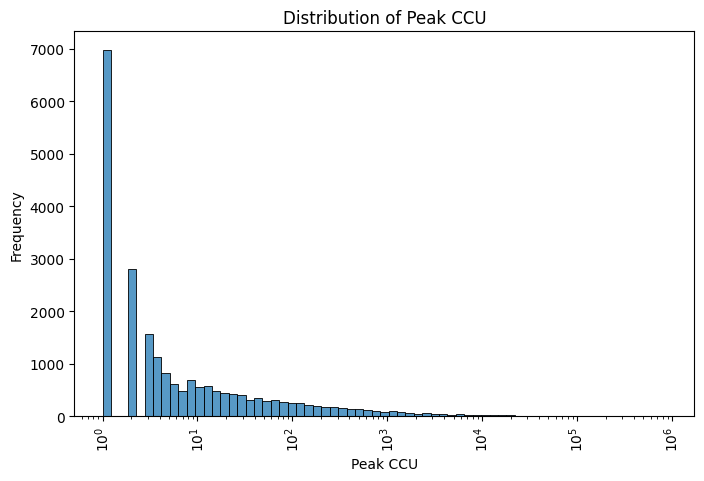

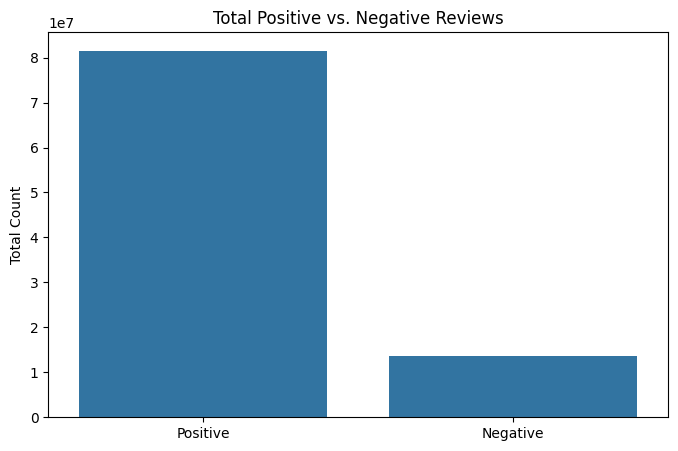

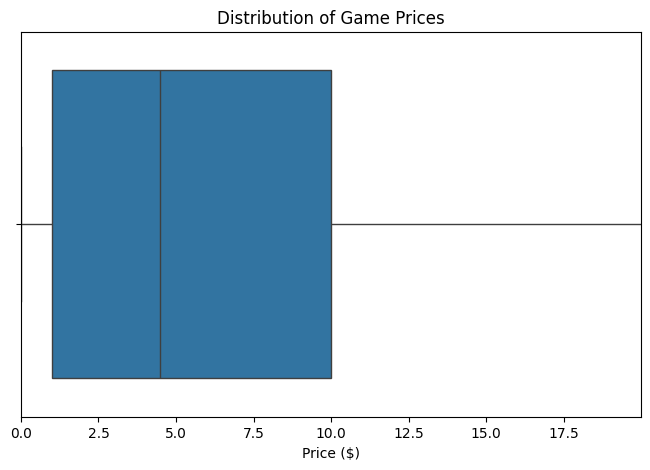

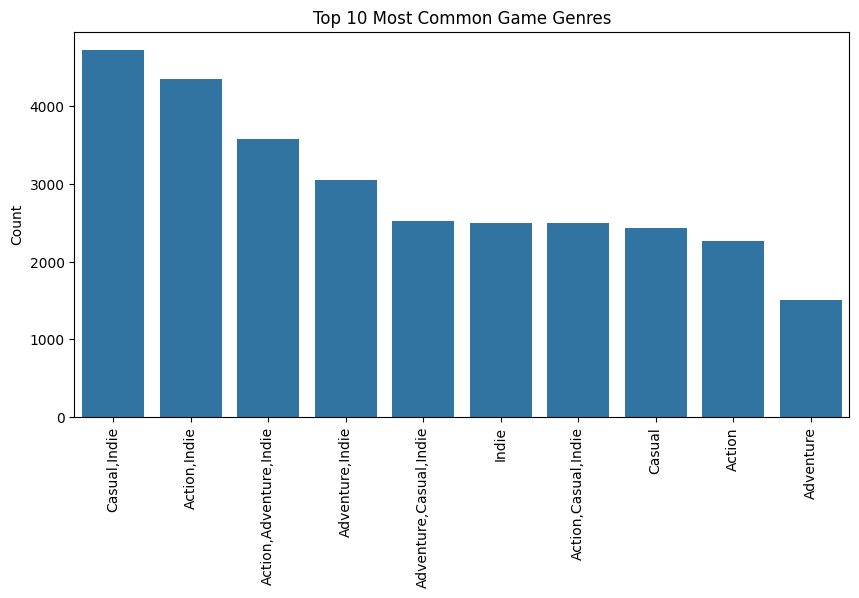

In [25]:
# 1. Histogram of Estimated Owners
plt.figure(figsize=(8, 5))
sns.histplot(df['Peak CCU'], log_scale=True)
plt.xlabel("Peak CCU")
plt.ylabel("Frequency")
plt.title("Distribution of Peak CCU")
plt.xticks(rotation=90)
plt.show()

# 2. Bar chart of Positive vs. Negative Reviews
plt.figure(figsize=(8, 5))
sns.barplot(x=['Positive', 'Negative'], y=[df['Positive'].sum(), df['Negative'].sum()])
plt.ylabel("Total Count")
plt.title("Total Positive vs. Negative Reviews")
plt.show()

# 3. Boxplot of Game Prices
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.xlabel("Price ($)")
plt.title("Distribution of Game Prices")
plt.xlim(0, df['Price'].quantile(0.95))  # Remove extreme outliers
plt.show()

# 4. Top Genres Distribution
all_genres = [genre for sublist in df['Genres'].dropna().str.split(';') for genre in sublist]
top_genres = dict(Counter(all_genres).most_common(10))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()))
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Top 10 Most Common Game Genres")
plt.show()

In [27]:
# 2. Stacked Bar Chart of Positive vs. Negative Reviews
sentiment_df = df[['Positive', 'Negative']].sum().reset_index()
sentiment_df.columns = ['Sentiment', 'Count']
sentiment_df

,Sentiment,Count
0,Positive,81558754
1,Negative,13580369


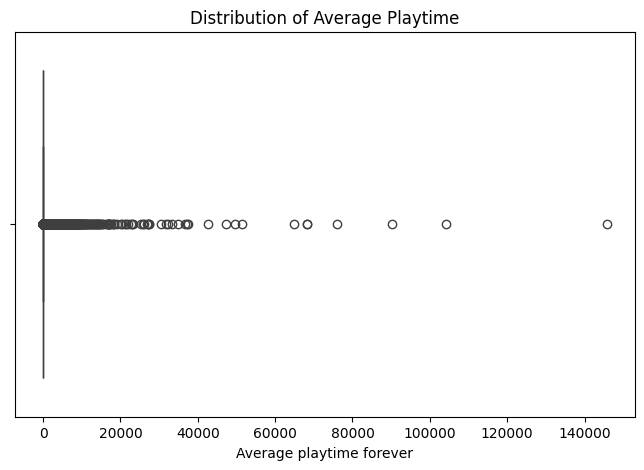

In [36]:
# Playtime Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Average playtime forever"])
plt.title("Distribution of Average Playtime")
plt.show()

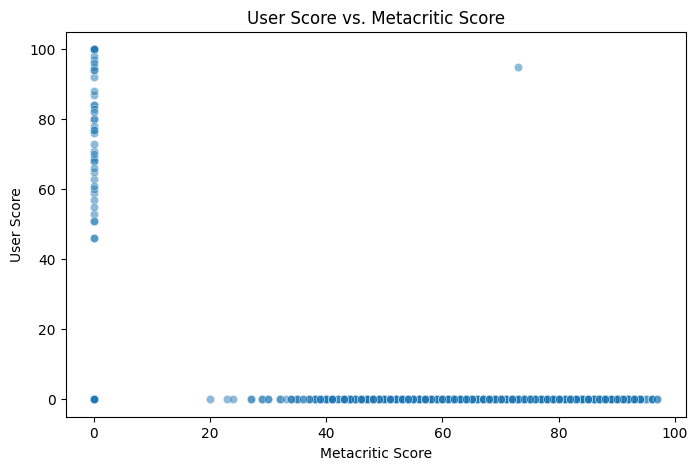

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Metacritic score"], y=df["User score"], alpha=0.5)
plt.title("User Score vs. Metacritic Score")
plt.xlabel("Metacritic Score")
plt.ylabel("User Score")
plt.show()

## Agent #1

In [118]:
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Developers', 'Categories', 'Genres',
       'Tags', 'Genre_Label'],
      dtype='object')

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

# Encode genres into labels
label_encoder = LabelEncoder()
df['Genre_Label'] = label_encoder.fit_transform(df['Genres'].astype(str))

# TF-IDF Vectorization on game descriptions and tags
tfidf_desc = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf_desc = tfidf_desc.fit_transform(df['About the game'].fillna(""))

tfidf_tags = TfidfVectorizer(stop_words='english', max_features=2000)
X_tfidf_tags = tfidf_tags.fit_transform(df['Tags'].astype(str).fillna(""))

# Normalize numerical features (Price and Ratings)
scaler = MinMaxScaler()
df['Price'] = df['Price'].fillna(0)  # Fill missing prices with 0
df['User score'] = df['User score'].fillna(df['User score'].mean())  # Fill missing ratings with mean
X_numeric = scaler.fit_transform(df[['Price', 'User score']])

# Convert scaled numerical features back to DataFrame
X_numeric_df = pd.DataFrame(X_numeric, columns=['Price', 'User score'])

# Combine TF-IDF features with numerical features
X_combined = hstack([X_tfidf_desc, X_tfidf_tags, X_numeric_df])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['Genre_Label'], test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.24093603744149766


In [ ]:
def recommend_similar_games(game_name, df, model, vectorizer_desc, vectorizer_tags, scaler, encoder, num_recommendations=5):
    # Convert all game names to lowercase for case-insensitive matching
    game_name = game_name.lower()
    df['Name_lower'] = df['Name'].str.lower()

    # Check if the game exists in the dataset
    if game_name not in df['Name_lower'].values:
        return "Game not found!"

    # Get the game's description and tags
    game_row = df[df['Name_lower'] == game_name].iloc[0]
    
    if pd.isna(game_row['About the game']):
        return "Game description not available!"

    game_desc = game_row['About the game']
    game_tags = ' '.join(game_row['Tags']) if isinstance(game_row['Tags'], list) else game_row['Tags']
    game_price = game_row['Price']
    game_user_score = game_row['User score']
    
    # Transform description and tags to vectors
    game_vector_desc = vectorizer_desc.transform([game_desc])
    game_vector_tags = vectorizer_tags.transform([game_tags])
    
    # Normalize numerical features
    game_numeric_df = pd.DataFrame([[game_price, game_user_score]], columns=['Price', 'User score'])
    game_numeric = scaler.transform(game_numeric_df)
    
    # Combine all features
    game_vector = hstack([game_vector_desc, game_vector_tags, game_numeric])
    
    # Predict the genre
    predicted_genre = model.predict(game_vector)[0]

    # Find similar games within the predicted genre
    recommended_games = df[df['Genre_Label'] == predicted_genre][['Name', 'Genres', 'Price']]
    
    if recommended_games.empty:
        return "No recommendations found!"

    return recommended_games.sample(min(num_recommendations, len(recommended_games)))

print(recommend_similar_games("Portal 2", df, nb_model, tfidf_desc, tfidf_tags, scaler, label_encoder))

                Name                    Genres  Price
2590   ARC Continuum  [Action,Adventure,Indie]   9.99
31848    Neon Blight  [Action,Adventure,Indie]  19.99
55407           DMN7  [Action,Adventure,Indie]   7.99
64614          Scorn  [Action,Adventure,Indie]  35.99
30342    Last Memory  [Action,Adventure,Indie]   2.99
